# For Tom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

def Logistic(x, K, N_o, r):
    y = K / (1 + ((K-N_o)/N_o)*np.exp(-r*x))
    return y

def fit_and_report(func, x, y):
    parameters, covariance = curve_fit(Logistic, x, y)
    print(f'K={parameters[0]} +/- {covariance[0,0]*np.sqrt(len(x))}')
    print(f'N_o={parameters[1]} +/- {covariance[1,1]*np.sqrt(len(x))}')
    print(f'r={parameters[2]} +/- {covariance[2,2]*np.sqrt(len(x))}')
    return parameters, covariance

In [11]:
data = pd.read_csv('Sf9_test.csv', index_col='time')

data


,A,B,C
time,,,
0,400000,475000,650000
24,400000,475000,650000
48,388000,200000,925000
72,338000,938000,938000
96,2290000,1300000,775000
120,3050000,4260000,2660000
144,4740000,7930000,3240000
168,10600000,8050000,12800000
192,11500000,9850000,8980000


In [3]:
data = pd.read_csv('DH5xsoypea.csv', header=0, index_col='time)

concatetimes = np.concatenate([data.index.values,data.index.values,data.index.values])
concatvalues = np.concatenate([data.A.values,data.B.values,data.C.values])


ValueError: Index time invalid

In [3]:
concatvalues

array([0.05 , 0.076, 0.214, 0.442, 0.627, 0.997, 1.13 , 1.427, 1.656,
       1.858, 2.048, 2.148, 2.217, 0.05 , 0.059, 0.22 , 0.314, 0.447,
       0.701, 0.881, 0.961, 1.316, 1.592, 1.824, 2.03 , 2.142, 0.05 ,
       0.019, 0.042, 0.078, 0.141, 0.193, 0.318, 0.539, 0.727, 1.036,
       1.139, 1.162, 1.264])

K=2.059383695445381 +/- 0.5333019646507412
N_o=0.07075088421794268 +/- 0.013299950154665917
r=0.47342233692533087 +/- 0.08881649749703072


Text(0.5, 0, 'Time[hours]')

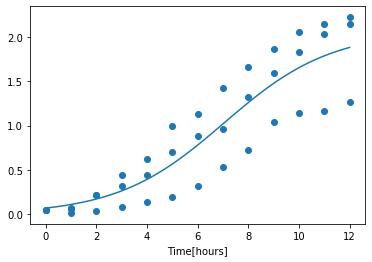

In [4]:
x = np.linspace(np.min(concatetimes),np.max(concatetimes),1000)
plt.scatter(concatetimes,concatvalues)
parms, covar = fit_and_report(Logistic,concatetimes, concatvalues)
plt.plot(x, Logistic(x,*parms))
plt.xlabel('Time[hours]')

In [5]:
K = 10
b = 5
r = 0.5
N_0 = K/(1+b)
print(K,r,N_0)

10 0.5 1.6666666666666667


In [6]:
plt.scatter(x,y)
plt.plot(x,Logistic(x, *parameters))

NameError: name 'y' is not defined

In [7]:
print(*parameters)

NameError: name 'parameters' is not defined

In [8]:
data = pd.read_csv('BL21soypea.csv')
print(data)

     time      A      B      C      D      E      F
0    0.00  0.050  0.050  0.050  0.050  0.050  0.050
1    1.25  0.095  0.076  0.082  0.111  0.086  0.088
2    2.25  0.183  0.138  0.129  0.215  0.203  0.180
3    3.25  0.450  0.306  0.252  0.514  0.524  0.448
4    4.25  0.745  0.494  0.395  0.945  0.929  0.814
5    5.25  1.429  0.963  0.767  1.568  1.526  1.455
6    6.25  1.949  1.412  1.187  2.101  1.955  1.874
7    7.25  1.990  1.799  1.500  2.193  2.154  1.962
8    8.25  2.067  1.741  1.683  2.160  2.094  1.961
9    9.25  2.091  1.700  1.646  2.210  2.077  1.939
10  10.25  2.085  1.759  1.676  2.174  2.132  1.907


In [57]:
parms, conv = fit_and_report(Logistic,data.time, data.A)

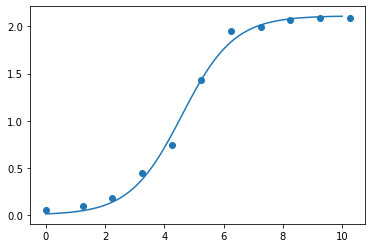

In [58]:
plt.scatter(data.time,data.A)
plt.plot(x,Logistic(x,*parms))

In [59]:
print(parms)
print(np.sqrt(np.diagonal(conv)))

[2.11212085 0.01114745 1.1404232 ]
[0.03977359 0.00492588 0.09871303]


In [66]:
for column in ['A','B','C','D','E','F']:
    parms, conv = fit_and_report(Logistic,data.time, data[column])
    print(column, *parms)
    print(f'sigma_{column}', *np.sqrt(np.diagonal(conv)))
    print(f' Doubling Time for {column}: {np.log(2)/parms[2]}\n')

A 2.11212085137806 0.011147445763137125 1.1404231990053824
sigma_A 0.039773590152865114 0.004925875883814005 0.0987130253824317
 Doubling Time for A: 0.607798211369667

B 1.795082834043127 0.007762874902765766 1.0829035645196445
sigma_B 0.04917248011296354 0.004657168353769642 0.12352139813910397
 Doubling Time for B: 0.6400820934294479

C 1.7306228376632697 0.010699579960624676 0.9379733719770309
sigma_C 0.037909801479542635 0.003890027030502104 0.07105412972289159
 Doubling Time for C: 0.7389838573977333

D 2.2306442129296817 0.014845439162013202 1.133920709438762
sigma_D 0.03697742299550736 0.0056222416336844504 0.08802129590254064
 Doubling Time for D: 0.611283641607552

E 2.15101790480194 0.016892962183718507 1.100574072498723
sigma_E 0.0316255758628971 0.005360586232387142 0.07426467051175553
 Doubling Time for E: 0.6298051152397556

F 1.9768400656534062 0.00950915345399716 1.2119692220179674
sigma_F 0.0341767141230096 0.004233134290321744 0.1032451422432233
 Doubling Time for F: